# 04-8 원그래프
- 데이터의 비율을 비교할 때 유용한 그래프
- ax.pie() 사용

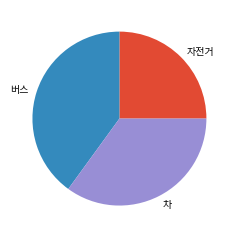

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

labels=['자전거','버스','차']
sizes = [25,40,35]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(sizes, labels=labels)

plt.show()

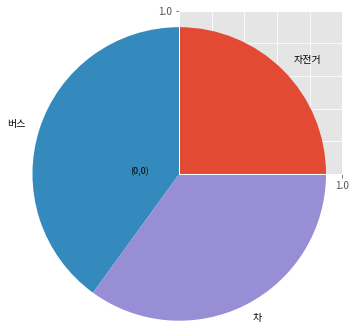

In [7]:
# 원그래프와 축의 관계 그리기
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

ax.pie(sizes, labels=labels, radius=0.9, frame=True)
ax.text(-0.3, 0, '(0,0)', fontsize=9)

plt.show()

### 원그래프 서식설정
- explode 요소 분리시
- labels
- colors
- autopct 수치레이블 서식 설정. 표시형식은 문자열
- pctdistance 수치레이블 위치
- shadow 배경의표시여부
- labeldistance 레이블의 위치
- startangle
- radius
- counterclock 표시순서 True:반시계, False: 시계
- wedgeprops 요소 서식
- textprops 텍스트 서식
- center 중심좌표
- frame  축, 테두리선 유무

원그래프의 서식설정을 하는경우

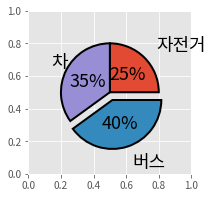

In [8]:
# 원그래프 서식 설정
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

# 부채꼴 서식 설정용 사전
wprops = {'edgecolor' : 'black',
          'linewidth' : 2}

# 텍스트 서식 설정용 사전
tprops = {'fontsize':18}

ax.pie(sizes,
       explode=(0, 0.05, 0),  # 분리하고 싶은 순서의 요소에 분리거리를 입력. 이경우에는 2번째껄 0.05 띄운다.
       labels=labels,
       autopct='%1.0f%%',
       pctdistance=0.5,
       shadow=False,
       labeldistance=1.35,
       startangle=90,
       radius=0.3,
       counterclock=False,
       wedgeprops=wprops,
       textprops=tprops,
       center=(0.5,0.5),
       frame=True)

plt.show()

원그래프 활용하기

In [15]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')

df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')
df

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


- movie와 tv의 총멤버수 내역을 원그래프로 그림
- 원그래프는 90도 위치에서 시계방향으로 내림차순으로 나열

In [22]:
# TV
df_tv = df.sort_values(by='TV', ascending=False)['TV']

# Movie
df_movie = df.sort_values(by='Movie', ascending=False)['Movie']

df_tv

genre
Comedy          65420862.0
Action          63364032.0
Drama           41011557.0
Romance         40703388.0
Supernatural    38956520.0
Shounen         35532847.0
School          35489099.0
Fantasy         34932563.0
Sci-Fi          28072322.0
Adventure       27529975.0
Name: TV, dtype: float64

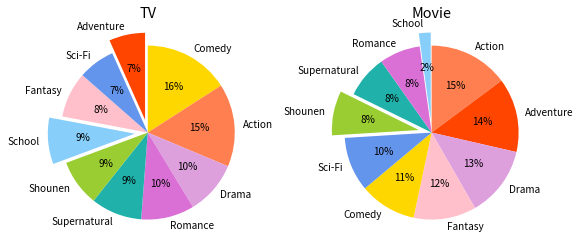

In [27]:
# TV와 Movie와의 장르내역 비교를 위한 원그래프 그리기
fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 컬러세트
colors1 = ('gold', 'coral', 'plum', 'orchid', 'lightseagreen', 'yellowgreen', 'lightskyblue', 'pink', 'cornflowerblue', 'orangered')
colors2 = ('coral', 'orangered', 'plum', 'pink', 'gold', 'cornflowerblue', 'yellowgreen', 'lightseagreen', 'orchid', 'lightskyblue')

# TV 원그래프
ax1.pie(df_tv,
       explode=(0,0,0,0,0,0,0.15,0,0,0.15),
       labels=df_tv.index,
       autopct='%1.0f%%',
       colors=colors1,
       startangle=90, counterclock=False)

# Movie 원그래프
ax2.pie(df_movie,
       explode=(0,0,0,0,0,0,0.15,0,0,0.15),
       labels=df_movie.index,
       autopct='%1.0f%%',
       colors=colors2,
       startangle=90, counterclock=False)

ax1.set_title('TV')
ax2.set_title('Movie')

fig.subplots_adjust(wspace=0.3) # 서브블록 사이의 공간 조정

plt.show()
